In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from src.encoders_decoders import *
from src.losses import *
from torch.utils.data import DataLoader
import itertools
import random

In [2]:
#Architecture parameters and distributions of stimuli
N = 30
K = 10
p_x = torch.distributions.uniform.Uniform(-3,15)

#Training parameters
N_EPOCHS = 5000
N_SAMPLES = 500
lr = 1e-2
BATCH_SIZE = 500

#Generate samples
x_samples = p_x.sample((N_SAMPLES,))[:,None]
x_sorted,indices = x_samples.sort(dim=0)
x_min,x_max = x_sorted[0,:].item(),x_sorted[-1,:].item()
x_data = torch.utils.data.DataLoader(x_samples,batch_size=BATCH_SIZE)
x_fine = torch.linspace(x_min,x_max,1000)[:,None]

Text(0, 0.5, 'Encoding')

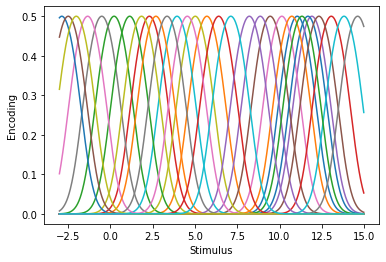

In [3]:
#Initialization of encoder and decoder 
#enc = BernoulliEncoder(N,x_min-0.2,x_max+0.2,x_sorted)
enc = BernoulliEncoder(N,x_min-3,x_max+3,x_sorted)

plt.plot(x_fine,torch.sigmoid(enc(x_fine)).detach())
plt.xlabel("Stimulus")
plt.ylabel("Encoding")

In [4]:
#q = rate_ising(N)
#q.J.register_hook(lambda grad: grad.fill_diagonal_(0))
dec = MLPDecoder(N,100)
#dec = GaussianDecoder()
#params = itertools.chain(enc.parameters(),q.parameters())
params = list(dec.parameters()) #+ list(enc.parameters())#+  #+ list(q.parameters())
lr = 1e-4
opt = torch.optim.SGD(params,lr)
lVec = []
for i in range(1000):
    #rate = q(enc,x_fine)
    distortion = distortion_gaussian(x_fine,enc,dec)
    #print(enc.log_sigmas.grad)
    loss = distortion #+ 0.1*rate
    opt.zero_grad()
    loss.backward()
    opt.step()
    lVec.append(loss.item())


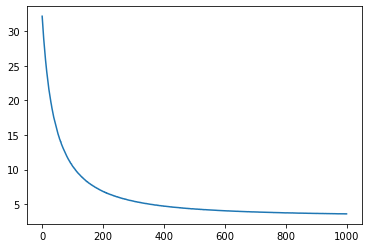

In [5]:
plt.plot(lVec)

In [6]:
plt.imshow(q.J.detach(),vmin=q.J.min().item(),vmax=q.J.max().item())

NameError: name 'q' is not defined

Text(0, 0.5, 'Encoding')

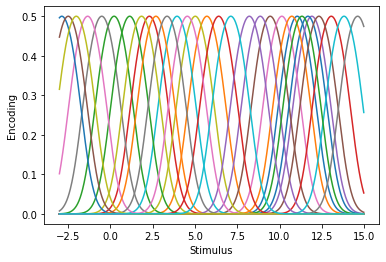

In [7]:
x_exp = torch.linspace(x_min-100,x_max+100,1000)[:,None]
plt.plot(x_fine,torch.sigmoid(enc(x_fine)).detach())
plt.xlabel("Stimulus")
plt.ylabel("Encoding")

In [8]:
r= enc.sample(x_fine,15)
mu_dec,sigma2_dec = dec(r)
x_ext = dec.sample(r,10)

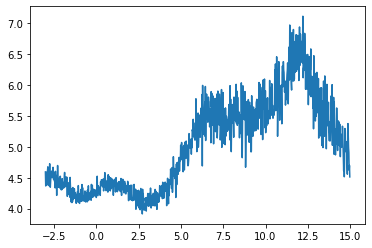

In [9]:
with torch.no_grad():
    #plt.plot(x_fine, mu_dec.mean(dim=1) -x_fine[:,0] )
    plt.plot(x_fine,torch.sqrt(sigma2_dec.mean(dim=1)))

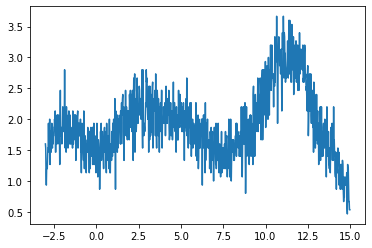

In [10]:
plt.plot(x_fine,r.sum(dim=2).mean(dim=1))

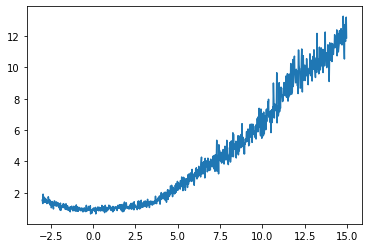

In [11]:
mseVec = ((x_ext - x_fine[None,:])**2).mean(dim=(0,2))
plt.plot(x_fine,mseVec.detach()/20)

In [15]:
lat_samp = 15
tau = 0.5
l_r_x = enc(x_fine)
bsize,N = l_r_x.shape
#ALERT: Gumbel Softmax trick
eps = torch.rand(bsize,lat_samp,N)
r = torch.sigmoid((torch.log(eps) - torch.log(1-eps) + l_r_x[:,None,:])/tau)
mu_dec,sigma2_dec = dec(r)
    

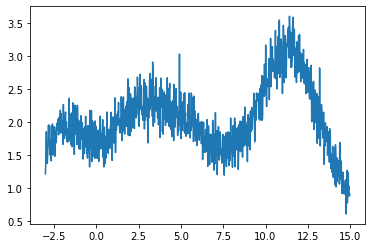

In [13]:
r.sum(dim=2).mean(dim=1)
plt.plot(x_fine,r.sum(dim=2).mean(dim=1).detach())

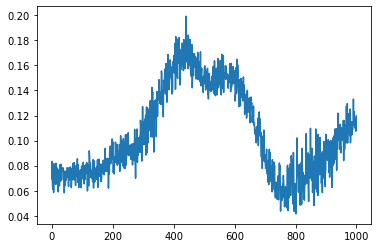

In [14]:
plt.plot(mu_dec.mean(dim=1).detach())

In [29]:
mu_dec

torch.Size([1000, 15])

In [ ]:
a=3

Error: Kernel is dead